In [1]:
pip install --upgrade pip setuptools wheel


DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tensorflow_io_gcs_filesystem-0.36.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tf_slim-1.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/pycocotools-2.0.7-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /

In [2]:
pip install scikit-learn


DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tensorflow_io_gcs_filesystem-0.36.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tf_slim-1.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/pycocotools-2.0.7-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /

In [1]:
import sklearn
print(sklearn.__version__)



1.4.0


In [2]:
!pip install tensorflow transformers pandas numpy scikit-learn



DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tensorflow_io_gcs_filesystem-0.36.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tf_slim-1.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/pycocotools-2.0.7-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /

In [3]:
import tensorflow as tf
from transformers import __version__ as transformers_version
import pandas as pd
import numpy as np
import sklearn
import os 
print("TensorFlow version:", tf.__version__)
print("Transformers version:", transformers_version)
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)



TensorFlow version: 2.15.0
Transformers version: 4.32.1
Pandas version: 1.5.3
Numpy version: 1.24.4
Scikit-learn version: 1.4.0


In [4]:
df = pd.read_csv('train.csv')



In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [7]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [8]:
# to get everything except 1 and 2 column 
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [9]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

# PREPROCESSING

In [10]:
#Execellent NLP Library to vectorize the text
from tensorflow.keras.layers import TextVectorization

In [11]:
# A sample of how are we gonna store the one-hot encoded Vectors
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [12]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [13]:
# Word Embedding. It is number of words in the vocab
MAX_FEATURE = 200000


In [14]:
#It is going to map each word to vector (like I as 1 am as 2 pranav as 3...)

vectorizer = TextVectorization(max_tokens=MAX_FEATURE, output_sequence_length=1800, output_mode = 'int')

2024-12-22 13:09:50.088158: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-22 13:09:50.088197: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-22 13:09:50.088202: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-22 13:09:50.088270: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-22 13:09:50.088424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
#Used to train and map the words 
vectorizer.adapt(X.values)

2024-12-22 13:09:50.225667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [16]:
#This shows the vectorization for random text. Here Hello is 288 Pranav is 1 ...
vectorizer('Hello Pranav! How are you doing')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288,   1,  73, ...,   0,   0,   0])>

In [17]:
vectorized_text = vectorizer(X.values)

In [18]:
#We vectorized all the words
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [19]:
#Now we need to create a tensorflow data pipeline
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent the bottlenecks

In [20]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [21]:
#Now create the training, testing and validation 
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*.1))

In [22]:
train_generator = train.as_numpy_iterator()


In [23]:
#It will update the gradients in each batch and then mopve to the next batch step by step. 
train_generator.next()

(array([[     1,     94,     13, ...,      0,      0,      0],
        [  9214, 144897, 179640, ...,      0,      0,      0],
        [    46,     33,     15, ...,      0,      0,      0],
        ...,
        [   118,   1086,    175, ...,      0,      0,      0],
        [  4540,     19,     58, ...,      0,      0,      0],
        [   345,      7,   8424, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# Train Neural Networks

In [24]:
#We will first create the sequential layers
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding


In [25]:
#We will get the embedding layers
#model = Sequential()

#model.add(Embedding(MAX_FEATURE+1, 32)) #Declaring the embedding layers 
#model.add(Bidirectional(LSTM(32, activation='tanh'))) #Bi-directional Activational layer LSTM
#model.add(Dense(128, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(6, activation='sigmoid'))

In [26]:
#model.compile(loss='BinaryCrossEntropy', optimizer='Adam')

In [27]:
#model.summary()

In [28]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
#model.summary()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping

# Reduced complexity for debugging
model = Sequential()
model.add(Embedding(MAX_FEATURE+1, 16))  # Reduced dimensionality
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Added Dropout for regularization
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Assuming 'train' and 'val' are already defined
history  = model.fit(train, epochs=10, validation_data=val, callbacks=[early_stopping])


Epoch 1/10
6981/6981 [==============================] - 2857s 409ms/step - loss: 0.0685 - accuracy: 0.9642 - precision: 0.7735 - recall: 0.5527 - val_loss: 0.0460 - val_accuracy: 0.9934 - val_precision: 0.7604 - val_recall: 0.7604
Epoch 2/10
6981/6981 [==============================] - 2747s 394ms/step - loss: 0.0461 - accuracy: 0.9895 - precision: 0.8090 - recall: 0.6913 - val_loss: 0.0423 - val_accuracy: 0.9941 - val_precision: 0.8149 - val_recall: 0.7251
Epoch 3/10
6981/6981 [==============================] - 6363s 912ms/step - loss: 0.0429 - accuracy: 0.9640 - precision: 0.8196 - recall: 0.7197 - val_loss: 0.0400 - val_accuracy: 0.9943 - val_precision: 0.8736 - val_recall: 0.6646
Epoch 4/10
6981/6981 [==============================] - 2982s 427ms/step - loss: 0.0400 - accuracy: 0.9685 - precision: 0.8269 - recall: 0.7339 - val_loss: 0.0370 - val_accuracy: 0.9940 - val_precision: 0.8760 - val_recall: 0.6907
Epoch 5/10
6981/6981 [==============================] - 4695s 673ms/step - l

In [31]:
#history = model.fit(train, epochs=1, validation_data =val)


In [32]:
from matplotlib import pyplot as plt

In [33]:
history.history

{'loss': [0.06849891692399979,
  0.04613996297121048,
  0.04287034273147583,
  0.03997233137488365,
  0.037381645292043686,
  0.03558361157774925,
  0.0340779572725296,
  0.03359867259860039,
  0.033933334052562714,
  0.033871714025735855],
 'accuracy': [0.9641526937484741,
  0.9895161986351013,
  0.9640005230903625,
  0.9684680104255676,
  0.8998531699180603,
  0.8621705174446106,
  0.8558229207992554,
  0.8260815143585205,
  0.8474519848823547,
  0.806743323802948],
 'precision': [0.7734872102737427,
  0.80899578332901,
  0.8195599913597107,
  0.8269001245498657,
  0.8347534537315369,
  0.836308479309082,
  0.8383410573005676,
  0.8405041098594666,
  0.8379866480827332,
  0.8325653672218323],
 'recall': [0.5527130961418152,
  0.6912916898727417,
  0.7196720838546753,
  0.7338607907295227,
  0.7530152797698975,
  0.766838550567627,
  0.7771052122116089,
  0.7856678366661072,
  0.7876349687576294,
  0.7912659049034119],
 'val_loss': [0.0460222102701664,
  0.042332082986831665,
  0.0399

<Figure size 800x500 with 0 Axes>

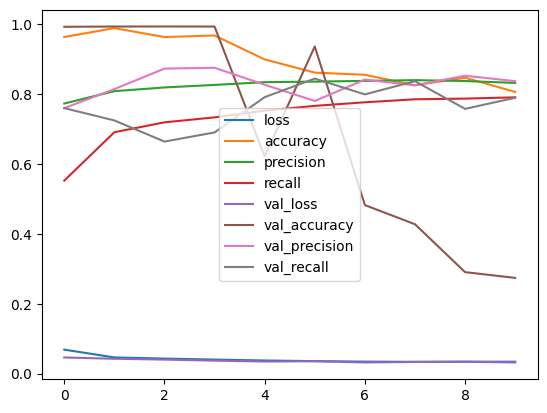

In [34]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Making Predictions

In [35]:
input_text = vectorizer('You freaking suck!')

In [36]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [37]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [38]:
batch = test.as_numpy_iterator().next()

In [39]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [40]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 1s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [41]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 122ms/step


In [42]:
res

array([[2.2059892e-05, 4.4229546e-06, 1.5512800e-06, 2.1158253e-04,
        8.8636239e-07, 2.9002153e-05],
       [1.9793517e-05, 4.1820149e-06, 1.5250204e-06, 2.1764317e-04,
        8.4877962e-07, 3.0112687e-05],
       [2.8117383e-05, 5.2210812e-06, 2.1871806e-06, 2.2295947e-04,
        1.1382200e-06, 3.0733394e-05],
       [1.4040660e-04, 1.0376497e-05, 6.3014304e-06, 1.8886715e-04,
        4.0811051e-06, 4.3868746e-05],
       [2.2446589e-05, 4.2444381e-06, 1.6698478e-06, 2.0091372e-04,
        8.7116467e-07, 2.7855083e-05],
       [4.8695324e-04, 4.9234201e-05, 5.0073431e-05, 5.0374068e-04,
        2.6789303e-05, 1.5354586e-04],
       [4.2049094e-05, 5.7573952e-06, 3.2532623e-06, 2.0544877e-04,
        1.4679299e-06, 2.8453776e-05],
       [8.5104061e-03, 3.4039412e-04, 5.9200957e-04, 4.4769365e-03,
        1.1458456e-03, 2.7901265e-03],
       [6.1241721e-05, 8.2539127e-06, 5.5191840e-06, 2.1961976e-04,
        2.3112884e-06, 3.6457983e-05],
       [2.7839043e-05, 4.9372384e-06,

# EVALUATION

In [43]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make Predictions
    yhat = model.predict(X_true)
    #Flatten predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)



1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 109ms/step


In [46]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.855150580406189, Recall:0.7868183255195618, Accuracy:0.5035105347633362


# Testing and Using Gradio (Hugging Face)

In [47]:
!pip install gradio jinja2

DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tensorflow_io_gcs_filesystem-0.36.0-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/tf_slim-1.1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/pranavmittal/anaconda3/lib/python3.11/site-packages/pycocotools-2.0.7-py3.11-macosx-11.1-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /

In [48]:
import gradio as gr

In [49]:
model.save('toxicity.h5')

/Users/pranavmittal/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
model = tf.keras.models.load_model('toxicity.h5')

In [51]:
input_str = vectorizer('hey i freaking hate you!!')

In [52]:
res = model.predict(np.expand_dims(input_str, 0))

1/1 [==============================] - 1s 755ms/step


In [53]:
res 

array([[0.93847924, 0.00949027, 0.08397367, 0.01506415, 0.5355974 ,
        0.08625905]], dtype=float32)

In [54]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [55]:
def score_comment(comment):
    # Ensure the comment is correctly formatted as a batch for prediction
    vectorized_comment = vectorizer([comment])  # Convert comment to vector
    results = model.predict(vectorized_comment)  # Make prediction

    text = ''
    # Iterate over the columns and append the results formatted as text
    for idx, col in enumerate(df.columns[2:]):  # Assuming columns[2:] are your target labels
        result_text = 'True' if results[0][idx] > 0.5 else 'False'
        text += f'{col}: {result_text}\n'
    return text



In [56]:
import gradio as gr

interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder="Comment to Score"),
    outputs="text"
)
interface.launch(share=True)



* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://482f5d1f4a3f3c1d32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
